In [26]:
d = {'X':{'X':0.3,'Y':0.2,'Z':0},'Y':{'X':0,'Y':0.2,'Z':0.8},'Z':{'X':0,'Y':0,'Z':1}}

m = {'X':{'A':0.6,'B':0.2,'C':0.2},'Y':{'A':0.1,'B':0.2,'C':0.3},'Z':{'A':0.3,'B':0.2,'C':0.3}}

ini = {'X':1,'Y':0,'Z':0}

l = ['X','Y','Z']

m1 = ['A','B','C']

In [27]:
#forward
for i in range(len(m1)):
    sum1=0
    sum2=0
    sum3=0
    for j in l:
        for k in l:
            m2 = d[j][k]*m[j][m1[i]]*ini[j]
            if k =='X':
                sum1=sum1+m2
            elif k=='Y':
                sum2=sum2+m2
            else:
                sum3=sum3+m2
ini['X'] = sum1
ini['Y'] = sum2
ini['Z'] = sum3

In [28]:
ini['X']

0.06

In [29]:
ini['Y']

0.04000000000000001

In [30]:
ini['Z']

0.0

In [31]:
#backward
ini = {'X':1,'Y':1,'Z':1}
for i in range(len(m1)):
    sum1=0
    sum2=0
    sum3=0
    for j in l:
        for k in l:
            m2 = d[j][k]*m[j][m1[len(m1)-i-1]]*ini[k]
            if k == 'X':
                sum1=sum1+m2
            elif k == 'Y':
                sum2=sum2+m2
            else:
                sum3=sum3+m2
ini['X']= sum1
ini['Y'] = sum2
ini['Z'] = sum3

In [32]:
ini['X']

0.18

In [33]:
ini['Y']

0.14

In [34]:
ini['Z']

0.38

In [35]:
#viterbi
seq = []
for i in range(len(m1)):
    sum1=0
    sum2=0
    sum3=0
    for j in l:
        for k in l:
            m2 = d[j][k]*m[j][m1[i]]*ini[j]
            if k =='X':
                sum1=max(sum1,m2)
            elif k=='Y':
                sum2=max(sum2,m2)
            else:
                sum3=max(sum3,m2)
    ini['X'] = sum1
    ini['Y'] = sum2
    ini['Z'] = sum3

    if(ini['X']>ini['Y']) & (ini['X']>ini['Z']):
        seq.append('X')
    elif(ini['Y']>ini['Z']) & (ini['Y']>ini['Z']):
        seq.append('Y')
    else:
        seq.append('Z')

In [36]:
ini['X']

0.00011663999999999998

In [37]:
ini['Y']

7.776000000000001e-05

In [38]:
ini['Z']

0.00684

In [39]:
seq

['Z', 'Z', 'Z']

In [40]:
import pandas as pd
import numpy as np
import networkx as nx

In [56]:
G = nx.DiGraph()

In [57]:
G.add_nodes_from(d)
G.add_nodes_from(m)

In [58]:
pos = {}
pos['X'] = (0,0)
pos['Y'] = (2,0)
pos['Z'] = (3,2)
pos['A'] = (2,2)
pos['B'] = (0,2)
pos['C'] = (2,3)

In [59]:
for i in d:
    for j in d[i]:
        G.add_edge(i,j,weight=d[i][j],label = f" {d[i][j]}")
for i in m:
    for j in m[i]:
        G.add_edge(i,j,weight=m[i][j],label = f" {m[i][j]}")      

{('X', 'X'): Text(0.0, 0.0, ' 0.3'),
 ('X', 'Y'): Text(1.0, 0.0, ' 0.2'),
 ('X', 'Z'): Text(1.5, 1.0, ' 0'),
 ('X', 'A'): Text(1.0, 1.0, ' 0.6'),
 ('X', 'B'): Text(0.0, 1.0, ' 0.2'),
 ('X', 'C'): Text(1.0, 1.5, ' 0.2'),
 ('Y', 'X'): Text(1.0, 0.0, ' 0'),
 ('Y', 'Y'): Text(2.0, 0.0, ' 0.2'),
 ('Y', 'Z'): Text(2.5, 1.0, ' 0.8'),
 ('Y', 'A'): Text(2.0, 1.0, ' 0.1'),
 ('Y', 'B'): Text(1.0, 1.0, ' 0.2'),
 ('Y', 'C'): Text(2.0, 1.5, ' 0.3'),
 ('Z', 'X'): Text(1.5, 1.0, ' 0'),
 ('Z', 'Y'): Text(2.5, 1.0, ' 0'),
 ('Z', 'Z'): Text(3.0, 2.0, ' 1'),
 ('Z', 'A'): Text(2.5, 2.0, ' 0.3'),
 ('Z', 'B'): Text(1.5, 2.0, ' 0.2'),
 ('Z', 'C'): Text(2.5, 2.5, ' 0.3')}

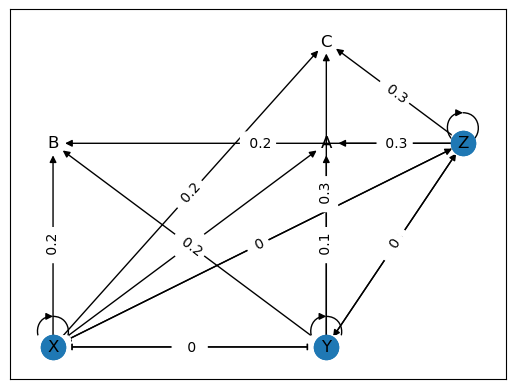

In [61]:
nx.draw_networkx_nodes(G,pos,nodelist=l)
nx.draw_networkx_nodes(G,pos,nodelist=m)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G,pos)
e = nx.get_edge_attributes(G,'label')
nx.draw_networkx_edge_labels(G,pos,edge_labels=e)